In [1]:
# 라이브러리 추가
import urllib.request
import json
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.5)
import matplotlib.pyplot as plt

In [2]:
# 데이터랩 API를 이용한 검색량 조회 함수(최대 5개)
def datalab_api(keywords):

    # 데이터랩 API
    client_id = "89L30Y3xCshEctCoab1v"
    client_secret = "aIoL3WXAsj"

    url = "https://openapi.naver.com/v1/datalab/search"

    body = {
        "startDate":"2016-01-01",
        "endDate":"2019-06-30",
        "timeUnit":"date",
        "keywordGroups":[
            {"groupName":str(keywords[0]),"keywords":[str(keywords[0])]},
            {"groupName":str(keywords[1]),"keywords":[str(keywords[1])]},
            {"groupName":str(keywords[2]),"keywords":[str(keywords[2])]},
            {"groupName":str(keywords[3]),"keywords":[str(keywords[3])]},
            {"groupName":str(keywords[4]),"keywords":[str(keywords[4])]},
        ],
    }
    body = json.dumps(body)

    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    json_obj = json.loads(response.read().decode('utf-8'))

    # 데이터프레임
    df1 = pd.DataFrame(json_obj['results'][0]['data']); df1.columns=['기간', str(keywords[0])]; df1.set_index('기간')
    df2 = pd.DataFrame(json_obj['results'][1]['data']); df2.columns=['기간', str(keywords[1])]; df2.set_index('기간')
    df3 = pd.DataFrame(json_obj['results'][2]['data']); df3.columns=['기간', str(keywords[2])]; df3.set_index('기간')
    df4 = pd.DataFrame(json_obj['results'][3]['data']); df4.columns=['기간', str(keywords[3])]; df4.set_index('기간')
    df5 = pd.DataFrame(json_obj['results'][4]['data']); df5.columns=['기간', str(keywords[4])]; df5.set_index('기간')
    
    # 데이터프레임 병합
    df2 = df1.merge(df2, how='outer', on='기간').fillna(0)
    df3 = df2.merge(df3, how='outer', on='기간').fillna(0)
    df4 = df3.merge(df4, how='outer', on='기간').fillna(0)
    df5 = df4.merge(df5, how='outer', on='기간').fillna(0)
    
    return df5

In [3]:
df = datalab_api(['국립공원', '가야산은분취', '거머리말', '금강초롱꽃', '금강모치'])
df.head(10)

,기간,국립공원,가야산은분취,거머리말,금강초롱꽃,금강모치
0,2016-01-01,9.60000,0.0,0.00000,0.56296,0.17777
1,2016-01-02,9.27407,0.0,0.00000,0.38518,0.00000
2,2016-01-03,8.65185,0.0,0.00000,0.65185,0.00000
3,2016-01-04,14.07407,0.0,0.00000,0.65185,0.00000
4,2016-01-05,11.49629,0.0,0.17777,0.80000,0.00000
5,2016-01-06,10.60740,0.0,0.00000,0.35555,0.20740
6,2016-01-07,11.05185,0.0,0.00000,0.44444,0.00000
7,2016-01-08,10.42962,0.0,0.26666,0.56296,0.00000
8,2016-01-09,7.73333,0.0,0.00000,0.62222,0.00000
9,2016-01-10,7.43703,0.0,0.00000,0.65185,0.14814


In [4]:
# 키워드 리스트 (깃대종 41개)
kw_list = [['국립공원'],
           ['가야산은분취', '거머리말', '금강초롱꽃', '금강모치'],
           ['구상나무', '긴점박이올빼미', '깽깽이풀', '끈끈이주걱'],
           ['남생이', '노랑무늬붓꽃', '눈잣나무', '둥근잎꿩의비름'],
           ['망개나무', '매화마름', '모데미풀', '물두꺼비'],
           ['반달가슴곰', '변산바람꽃', '부안종개', '비단벌레'],
           ['산개나리', '산양', '삵', '상괭이'],
           ['소나무', '솔나리', '솔부엉이', '수달'],
           ['여우', '열목어', '오색딱따구리', '원앙'],
           ['주목', '진노랑상사화', '털조장나무', '팔색조'],
           ['표범장지뱀', '풍란', '하늘다람쥐', '호반새'],
           ['히어리', '테스트', '테스트', '테스트', '테스트']]
i=1
while i < len(kw_list):
    print(kw_list[0]+kw_list[i]); i+=1

['국립공원', '가야산은분취', '거머리말', '금강초롱꽃', '금강모치']
['국립공원', '구상나무', '긴점박이올빼미', '깽깽이풀', '끈끈이주걱']
['국립공원', '남생이', '노랑무늬붓꽃', '눈잣나무', '둥근잎꿩의비름']
['국립공원', '망개나무', '매화마름', '모데미풀', '물두꺼비']
['국립공원', '반달가슴곰', '변산바람꽃', '부안종개', '비단벌레']
['국립공원', '산개나리', '산양', '삵', '상괭이']
['국립공원', '소나무', '솔나리', '솔부엉이', '수달']
['국립공원', '여우', '열목어', '오색딱따구리', '원앙']
['국립공원', '주목', '진노랑상사화', '털조장나무', '팔색조']
['국립공원', '표범장지뱀', '풍란', '하늘다람쥐', '호반새']
['국립공원', '히어리', '테스트', '테스트', '테스트', '테스트']


In [5]:
# '국립공원' 검색량 최소값, 최대값
df = datalab_api(kw_list[0]+kw_list[1])
a, b = df.iloc[:,1].min(), df.iloc[:,1].max()
print('국립공원 검색량 최소값: ' + format(a, ".5f") + ', 최대값: ' + format(b, ".5f"))

국립공원 검색량 최소값: 5.98518, 최대값: 100.00000


In [6]:
# 최소-최대 정규화를 적용한 데이터랩 검색량 조회 함수 (무제한)
def datalab_api_kw_list(kw_list):

    # df: '국립공원' 검색량 최소값, 최대값
    df = datalab_api(kw_list[0]+kw_list[1])
    a, b = df.iloc[:,1].min(), df.iloc[:,1].max()

    i=2
    while i < len(kw_list):
        df1 = datalab_api(kw_list[0]+kw_list[i])
        # df1: 국립공원 컬럼의 최소값, 최대값
        x, y = df1.iloc[:,1].min(), df1.iloc[:,1].max()
        # 최소-최대 정규화
        df1.iloc[:,2] = (df1.iloc[:,2] - x) / (y - x) * (b - a) + a
        df1.iloc[:,3] = (df1.iloc[:,3] - x) / (y - x) * (b - a) + a
        df1.iloc[:,4] = (df1.iloc[:,4] - x) / (y - x) * (b - a) + a
        df1.iloc[:,5] = (df1.iloc[:,5] - x) / (y - x) * (b - a) + a
        df1 = df1.drop(columns=['기간', '국립공원'])
        df = pd.concat([df, df1], axis=1)
        i+=1
    
    # '테스트' 검색량 삭제
    df = df[df.columns.drop(list(df.filter(regex='테스트')))]
    
    return df

In [7]:
# 데이터랩 깃대종
df = datalab_api_kw_list(kw_list)
df.head(10)

,기간,국립공원,가야산은분취,거머리말,금강초롱꽃,금강모치,구상나무,긴점박이올빼미,깽깽이풀,끈끈이주걱,...,원앙,주목,진노랑상사화,털조장나무,팔색조,표범장지뱀,풍란,하늘다람쥐,호반새,히어리
0,2016-01-01,9.60000,0.0,0.00000,0.56296,0.17777,2.162954,-0.000004,-0.000004,1.422208,...,3.94074,2.370365,0.000004,0.000004,3.614808,0.177787,1.985157,14.785183,0.414811,0.23703
1,2016-01-02,9.27407,0.0,0.00000,0.38518,0.00000,2.755551,-0.000004,0.503698,2.162954,...,3.14074,3.259253,0.000004,0.000004,3.229627,0.000018,1.955529,15.081464,0.296299,0.59259
2,2016-01-03,8.65185,0.0,0.00000,0.65185,0.00000,1.925910,-0.000004,0.237027,1.866656,...,3.11111,3.762960,0.000004,0.000004,3.555556,0.000018,3.407421,14.577787,0.325927,0.35555
3,2016-01-04,14.07407,0.0,0.00000,0.65185,0.00000,3.555551,-0.000004,0.533326,2.103699,...,4.41481,5.066666,0.000004,0.000004,3.881485,0.177787,2.518521,16.029620,0.355555,0.71111
4,2016-01-05,11.49629,0.0,0.17777,0.80000,0.00000,3.170358,-0.000004,0.355549,1.955550,...,4.20740,5.185181,0.000004,0.000004,3.644445,0.000018,2.340753,12.799986,0.296299,1.00740
5,2016-01-06,10.60740,0.0,0.00000,0.35555,0.20740,2.251836,-0.000004,0.385176,2.133327,...,6.07407,5.362958,0.177782,0.000004,4.177778,0.148159,3.229595,14.251819,0.000018,0.62222
6,2016-01-07,11.05185,0.0,0.00000,0.44444,0.00000,2.429625,-0.000004,0.562953,2.014805,...,4.26666,5.125929,0.000004,0.000004,4.118515,0.000018,2.518521,15.288860,0.000018,0.74074
7,2016-01-08,10.42962,0.0,0.26666,0.56296,0.00000,2.340731,-0.000004,0.474059,1.925910,...,4.23703,4.562959,0.000004,0.000004,4.029626,0.000018,3.407421,15.022208,0.207415,0.77037
8,2016-01-09,7.73333,0.0,0.00000,0.62222,0.00000,2.133327,-0.000004,0.592580,1.362953,...,3.31851,3.911112,0.000004,0.000004,3.822223,0.148159,2.488893,14.281448,0.000018,0.71111
9,2016-01-10,7.43703,0.0,0.00000,0.65185,0.14814,2.844433,-0.000004,0.355549,1.985177,...,3.14074,4.622222,0.000004,0.000004,4.088889,0.148159,2.251868,15.348116,0.148159,0.62222


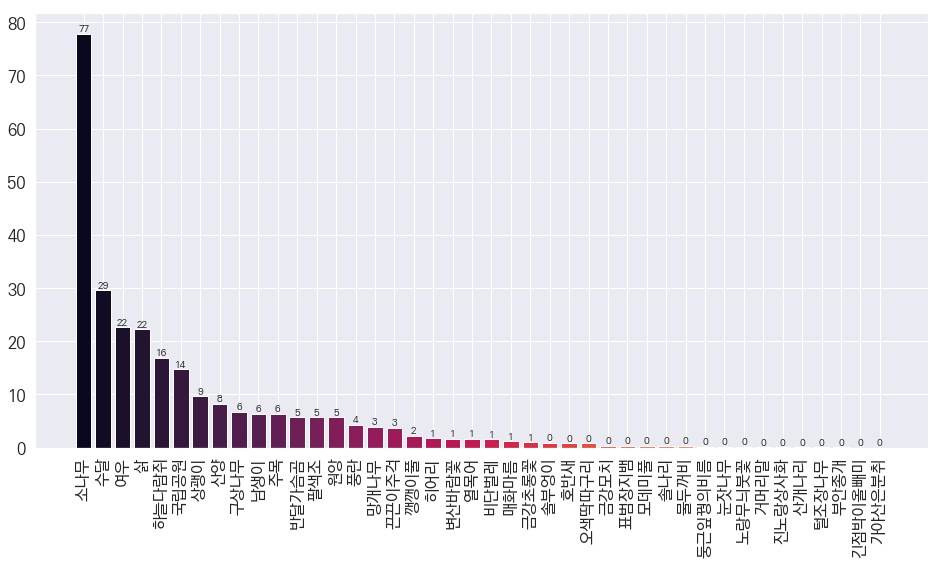

In [8]:
# 깃대종 전체 41종의 검색량 비교를 위한 바 플롯
df1 = pd.DataFrame(df.mean().sort_values(ascending=False), columns=['검색량'])
f, ax = plt.subplots(figsize=(16, 8));  plt.xticks(rotation=90)
plot = ax.bar(df1.index, df1['검색량'], color=sns.color_palette("rocket", len(df1.index)))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')

In [9]:
# 데이터랩 API 검색결과를 엑셀파일로 저장
df.to_excel('D:/GEODATA/datalab_kw_list.xlsx')